In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import plotnine as p9

In [2]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [4]:
D20_Lineage_assign=pd.read_csv(ProjectData_dir+'/T5_control/AGG_Day20/outs/count/crispr_analysis/protospacer_calls_per_cell.csv',header=0,sep=',')

In [5]:
df_D20_LineageSum=D20_Lineage_assign[D20_Lineage_assign['num_features']==1].feature_call.value_counts().to_frame()

In [8]:
D20_lineages=df_D20_LineageSum.index.tolist() #all observed on Day 20 

In [9]:
len(D20_lineages)

247

In [10]:
D0_adata=sc.read_h5ad(ProjectData_dir+'/T0_OAK/Anndata/OAK1to20_GEXwLineage_normalized.h5ad')

In [15]:
df_Lineagecoverage=pd.DataFrame(columns=['SubLibrary_count', 'Lineage_recovered'])
for i in range(20):
    df_Lineagecoverage.loc[i,'SubLibrary_count']=i+1
    df_Lineagecoverage.loc[i,'Lineage_recovered']=len([j for j in D20_lineages if j in D0_adata.obs[D0_adata.obs.aliquot.astype(int)<i+2].Lineage_assigned.tolist()])   

In [20]:
df_Lineagecoverage['D20lineage_recovered_onD0_percent']=(df_Lineagecoverage['Lineage_recovered']/len(D20_lineages))*100

In [21]:
df_Lineagecoverage.dtypes

SubLibrary_count                       int64
Lineage_recovered                      int64
D20lineage_recovered_onD0_percent    float64
dtype: object

In [22]:
df_Lineagecoverage=df_Lineagecoverage.astype(dtype={'SubLibrary_count':'int64','Lineage_recovered':'int64','D20lineage_recovered_onD0_percent':'float64'})

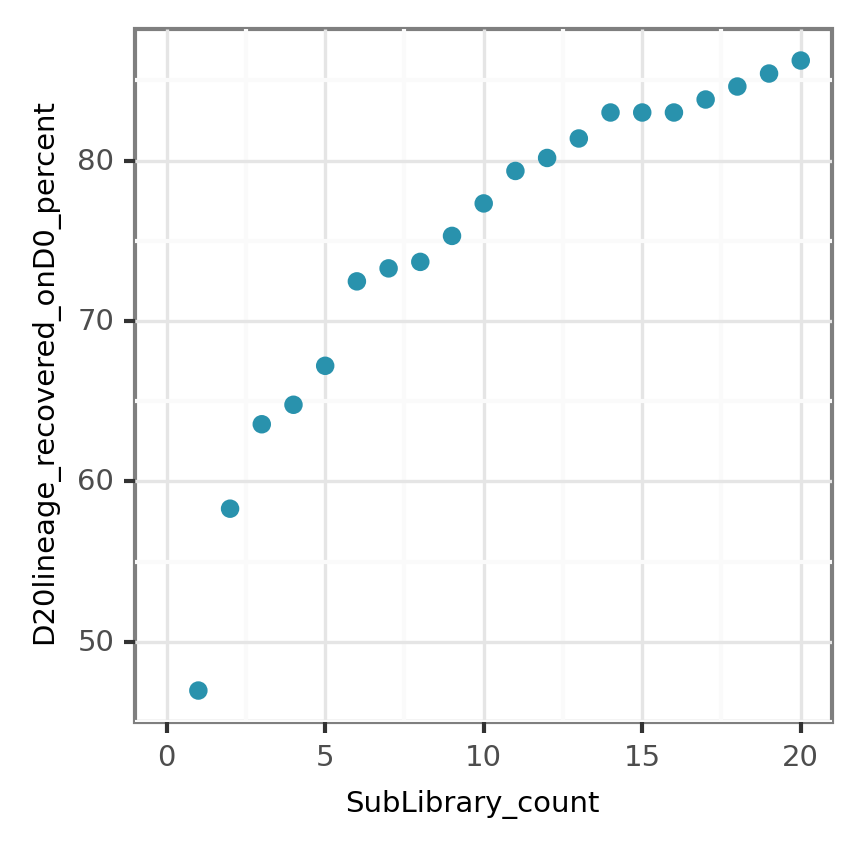

<ggplot: (2932243472351)>

In [23]:
plot=p9.ggplot(data=df_Lineagecoverage,
           mapping=p9.aes(x='SubLibrary_count',
                          y='D20lineage_recovered_onD0_percent',
                         ),
              )
plot+p9.geom_point(color='#2992AD') \
+ p9.themes.theme_bw() \
+ p9.scale_x_continuous(limits=(0, 20)) \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(3,3)) # 3 inch

In [24]:
plot=p9.ggplot(data=df_Lineagecoverage,
           mapping=p9.aes(x='SubLibrary_count',
                          y='D20lineage_recovered_onD0_percent',
                         ),
              )
plotsave=plot+p9.geom_point(color='#2992AD') \
+ p9.themes.theme_bw() \
+ p9.scale_x_continuous(limits=(0, 20)) \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.xlab('Number of sub-libraries') \
+ p9.ylab('Lineage recovery (%)') \
+ p9.theme(figure_size=(3,3)) # 3 inch

plotsave.save('LineageRecovery_D0.svg',height=3,width=3,format='svg',dpi=300) 

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 3 in image.
/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: LineageRecovery_D0.svg
